# AN ANALYSIS ON 'DATAFEST AFRICA'


In [1]:
import snscrape.modules.twitter as sntwitter # to scrape tweets
import pandas as pd # for dataframes

### Data Gathering

In [116]:
# specify the search words
query = '"lang:en" "since:2021-12-07" datafestafrica OR #datafestafrica OR #dfa22 OR dfa22 OR #datafestafrica22 OR datafestafrica22 OR "datafest africa" '
# Didn't use "datafest" because there are other events with that exact name not linked to Datafest Africa
tweets = [] # create an empty list where tweets would be appended to
limit = 25000 # number of tweets to scrape
count=0

In [117]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    count += 1 # to see progress as the tweets scrape to prevent insanity 
    # print(vars(tweet))  # printing the variables to see tweet's attributes
    # break
    if len(tweets) == limit:
        break
    else:
        # append necessary attributes to empty list
        tweets.append([tweet.date, tweet.content, tweet.user.username, 
        tweet.user.location, tweet.retweetCount, tweet.likeCount, tweet.sourceLabel, tweet.coordinates])
        print('Number ',count, ':success')

# turn 'tweets' list into a dataframe
df = pd.DataFrame(tweets, columns=['date','text','username','location','retweetcount','likecount','source','coordinates'])

# convert dataframe into csv file
df.to_csv('DFA22.csv', index=False)


# Data Assessment
Used Excel and Pandas for assessment

In [2]:
# Read the csv file back into a dataframe for assessment and cleaning
df_dfa = pd.read_csv('DFA22.csv')

In [3]:
df_dfa.head(3)

,date,text,username,location,retweetcount,likecount,source,coordinates
0,2022-10-16 16:39:45+00:00,@JoyceNwanochi @DataFestAfrica @saltypip @Yink...,eomereji,"Port Harcourt , Nigeria",0,0,Twitter Web App,NaN
1,2022-10-16 16:36:14+00:00,@KokoSandra @DavidAbu_ @DataFestAfrica Valid q...,Victoria_C_Dike,😎😎,0,0,Twitter for Android,NaN
2,2022-10-16 16:35:59+00:00,@ZaynabKareem2 @DataFestAfrica @Adewaleanalyst...,Toriaa_B,NaN,0,0,Twitter for Android,NaN


In [4]:
df_dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          10090 non-null  object
 1   text          10090 non-null  object
 2   username      10090 non-null  object
 3   location      8131 non-null   object
 4   retweetcount  10090 non-null  int64 
 5   likecount     10090 non-null  int64 
 6   source        10090 non-null  object
 7   coordinates   327 non-null    object
dtypes: int64(2), object(6)
memory usage: 630.8+ KB


In [5]:
sum(df_dfa.duplicated())

0

### Quality issues
1. Turn date into appropriate datatype
2. Replace Nulls in 'Location' to 'Unknown'

## Data Cleaning

In [6]:
# Replace Nulls in 'Location' to 'Unknown'
df_dfa['location']=df_dfa['location'].fillna('Unknown')

In [7]:
# Change date into appropriate datatype
df_dfa['date'] = pd.to_datetime(df_dfa['date'])

In [8]:
del df_dfa['coordinates']

In [9]:
import re # for regular expressions 

In [10]:
def cleanText(text):
    text = text.lower()
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = re.sub('\@\w+|\#\w+|\d+','',text) # Remove @mentions
    text = re.sub('http(s?)(:?)\/\/\S+','', text) # Removing the hyper link
    text = re.sub('#','',text)  # Removing the # symbols
    text = re.sub(':','',text)  # Removing the : symbols
    text = re.sub('\"','',text) # Removing the " symbols
    text = re.sub('\”','',text) # Removing the ” symbols
    text = re.sub('\“','',text) # Removing the “ symbols
    text = re.sub('\’','',text) # Removing the ’ symbols
    text = re.sub('\/','',text) # Removing the / symbols
    text = re.sub('\|','',text) # Removing the | symbols
    text = re.sub('\?','',text) # Removing the ? symbols
    text = re.sub('\.','',text) # Removing the . symbols
    text = re.sub('\,','',text) # Removing the , symbols
    text = re.sub('\!','',text) # Removing the ! symbols
    text = re.sub('@','',text) # Removing the @ symbols
    text = re.sub('\'','',text) # Removing the ' symbols
    text = re.sub('\\n','',text) # Removing the \n symbols
    text = re.sub('\\r','',text) # Removing the \r symbols
    text = re.sub('\*','',text) # Removing the * symbols
    text = emoji_pattern.sub('', text) # Removing emoji patterns
    return text

df_dfa['cleaned_text'] = df_dfa['text'].apply(cleanText)
df_dfa['location'] = df_dfa['location'].apply(cleanText)

In [11]:
df_dfa.sample(3)

,date,text,username,location,retweetcount,likecount,source,cleaned_text
6636,2022-09-13 13:02:52+00:00,@Xionne_ @DataFestAfrica @ebenezer_tomoye Fina...,_Psalmwell,here,0,1,Twitter Web App,finally
6925,2022-08-12 00:42:22+00:00,@acidiq_szn @DataFestAfrica Yo. Just seeing th...,ManLikeSIQ,way up you cant reach me,1,4,Twitter for Android,yo just seeing this your song is fire can yo...
2095,2022-10-14 18:36:11+00:00,Day one got me from frame one to frame 2 . Tha...,Bawzz_lady,unknown,14,124,Twitter for iPhone,day one got me from frame one to frame thank...


In [12]:
df_dfa['location'] = df_dfa['location'].replace(to_replace=[''], value='Unknown')
df_dfa['location'] = df_dfa['location'].replace(to_replace=['unknown'], value='Unknown')

## Data PreProcessing

Tokenization - This is breaking the raw text into small chunks(words, sentences) called tokens. These tokens help in understanding the context or developing the model for NLP. Tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

Stop words Removal - Stop words are commonly used words which are generally filtered out before processing a natural language. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and do not add much information to the text

In [12]:
import nltk # text analysis
from nltk.tokenize import word_tokenize # to create word tokens

In [13]:
from nltk.corpus import stopwords, words # get stopwords from NLTK library
stop_words = nltk.corpus.stopwords.words('english')
stopwords_2 = ["ive", "im", "youre", "youve", "youll", "youd", "shes", "thatll", "dont", 
                "shouldve", "arent", "couldnt", "didnt", "doesnt", "hadnt", "hasnt", "havent",
                 "isnt", "mightnt", "mustnt", "neednt", "shant", "shouldnt", "wasnt", "werent", "wont", 'wouldnt',
                'datafestafrica', 'dfa', 'datafestafrica22', 'dfa22', 'theres', "there'is", 'africa', 'datafest']
stop_words.extend(stopwords_2)

In [14]:
from emot.emo_unicode import UNICODE_EMOJI # For emojis
emojis = list(UNICODE_EMOJI.keys())  # full list of emojis to remove remaining emojis

In [15]:
def preprocessTweets(tweet):

    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [x for x in tweet_tokens if x not in stop_words] # Remove stopwords
    filtered_words = [x for x in filtered_words if x not in emojis] # Remove emojis

    filtered_words = ' '.join(filtered_words)

    return "".join(filtered_words)  # join words with a space in between them

In [16]:
df_dfa['Processed_Tweets'] = df_dfa['cleaned_text'].apply(preprocessTweets)

In [13]:
df_dfa.sample(3)

,date,text,username,location,retweetcount,likecount,source,cleaned_text
3508,2022-10-13 09:13:45+00:00,Getting bigger and better everyday.\n#DFA22 #D...,VictorOguche6,lagos nigeria,0,0,Twitter for Android,getting bigger and better everyday
6314,2022-09-17 20:59:41+00:00,@bolsaid @DataFestAfrica Thanks bro,DavidAbu_,global,0,0,Twitter for iPhone,thanks bro
2780,2022-10-14 09:30:47+00:00,Being purple - having the right technical skil...,DataStance,Unknown,1,3,Twitter for Android,being purple - having the right technical skil...


Lemmatization entails reducing a word to its dictionary form

In [18]:
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form

In [19]:
def processedTweets(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(x) for x in tweet_tokens]
    return " ".join(lemma_words)

In [20]:
df_dfa['Processed_Tweets'] = df_dfa['Processed_Tweets'].apply(processedTweets)

In [14]:
df_dfa.sample(3)

,date,text,username,location,retweetcount,likecount,source,cleaned_text
2243,2022-10-14 15:30:05+00:00,Be a PURPLE person; a combination of both tech...,godsonblizz,lagos nigeria,0,2,Twitter for Android,be a purple person; a combination of both tech...
5405,2022-10-03 18:32:05+00:00,@DataFestAfrica Somebody help!! 😭😭😭,malcom_okonkwo,Unknown,0,0,Twitter for iPhone,somebody help
9989,2022-04-12 08:29:09+00:00,"@saltypip @DataFestAfrica Lol, some of us are ...",cassiebassey,akwaibom,0,2,Twitter for iPhone,lol some of us are ghost tweeps… we just enj...


## Sentiment Analysis

In [138]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

In [139]:
# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [140]:
# Apply the functions to respective columns
df_dfa['polarity'] = df_dfa['Processed_Tweets'].apply(getPolarity)
df_dfa['Sentiment'] = df_dfa['polarity'].apply(getSentimentTextBlob)

In [ ]:
df_dfa.sample(3)

,date,text,username,location,retweetcount,likecount,source,cleaned_text
5599,2022-09-30 15:31:35+00:00,@Comejoinfolks @Bennykillua @DataFestAfrica Yo...,3didiongg,in gods will,0,0,Twitter for iPhone,your dm is locked oh
8964,2022-06-03 18:26:09+00:00,@GiftOjeabulu_ @DataFestAfrica Interested,Mazi_Samuel,outta this world,0,1,Twitter for Android,interested
3594,2022-10-13 07:17:30+00:00,Curious to know what part of Tech Database Adm...,DBA_Ryam,lagos nigeria,0,0,Twitter for iPhone,curious to know what part of tech database adm...


In [142]:
df_dfa['Sentiment'].value_counts()

Positive    9487
Negative     603
Name: Sentiment, dtype: int64

## Data Exploration

In [143]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df_dfa['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [144]:
import matplotlib.pyplot as plt

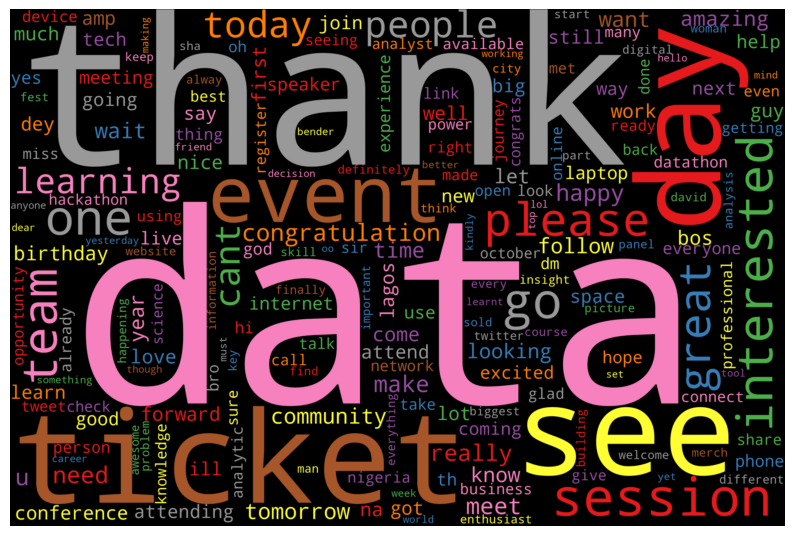

In [145]:
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap='Set1', collocations=False).generate(tweets_long_string)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("dfa.png", format="png") 
plt.show()

In [146]:
# Exported data to Excel to get Latitude and Longitude before visualization in PowerBI.
df_dfa.to_csv('dfa22_master.csv',encoding='utf-8-sig', index=False)
